<a href="https://colab.research.google.com/github/acg12/Scholarship-Bootcamp/blob/main/CASE_WEEK_1/ML/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, classification_report, \
roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Cleaning and Visual EDA

In [ ]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
variables = ['Survived', 'PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch']
df = df[variables]
df.head()

,Survived,PassengerId,Pclass,Age,SibSp,Parch
0,0,1,3,22.0,1,0
1,1,2,1,38.0,1,0
2,1,3,3,26.0,0,0
3,1,4,1,35.0,1,0
4,0,5,3,35.0,0,0


In [ ]:
df.describe()

,Survived,PassengerId,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,446.000000,2.308642,29.699118,0.523008,0.381594
std,0.486592,257.353842,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,223.500000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,446.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,668.500000,3.000000,38.000000,1.000000,0.000000
max,1.000000,891.000000,3.000000,80.000000,8.000000,6.000000


In [ ]:
df.isnull().sum()

Survived         0
PassengerId      0
Pclass           0
Age            177
SibSp            0
Parch            0
dtype: int64

Ternyata, kolom 'Age' memiliki banyak null value. Karena 'Age' merupakan variabel continuous, maka kita isi null valuenya dengan rata-rata dari kolom 'Age' tersebut.

In [ ]:
mean_age = df['Age'].mean()
df.loc[df['Age'].isna(), 'Age'] = mean_age
df.isnull().sum()

Survived       0
PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
dtype: int64

In [ ]:
df.corr()

,Survived,PassengerId,Pclass,Age,SibSp,Parch
Survived,1.000000,-0.005007,-0.338481,-0.069809,-0.035322,0.081629
PassengerId,-0.005007,1.000000,-0.035144,0.033207,-0.057527,-0.001652
Pclass,-0.338481,-0.035144,1.000000,-0.331339,0.083081,0.018443
Age,-0.069809,0.033207,-0.331339,1.000000,-0.232625,-0.179191
SibSp,-0.035322,-0.057527,0.083081,-0.232625,1.000000,0.414838
Parch,0.081629,-0.001652,0.018443,-0.179191,0.414838,1.000000


Hubungan SibSp dan Parch terlihat kuat. SibSp adalah jumlah Sibling/Spouse, dan Parch adalah jumlah Parent/Children. Dari grafik di bawah ini, pattern yang paling banyak muncul adalah seorang penumpang memiliki 2 Sibling/Spouse dan 2 Parent/Children.

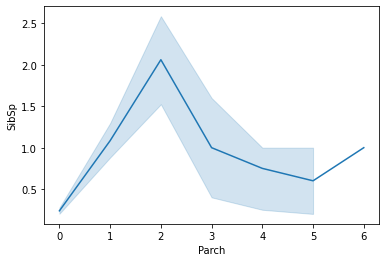

In [ ]:
sns.lineplot(x='Parch', y='SibSp', data=df)

Untuk hubungan dependent dan indepedent variabel, dari grafik di bawah ini, kita bisa melihat bahwa Pclass mempengaruhi kemungkinan Survive yang dimiliki seseorang.

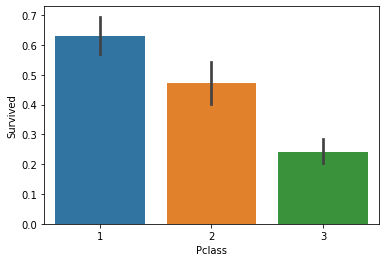

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=df)

Dari grafik di bawah ini, kita bisa melihat bahwa lebih banyak orang Survive ketika dia ada di Pclass 1, daripada Pclass 2 atau 3. Kemungkinan tidak survive lebih besar ketika seseorang berada di Pclass 3.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


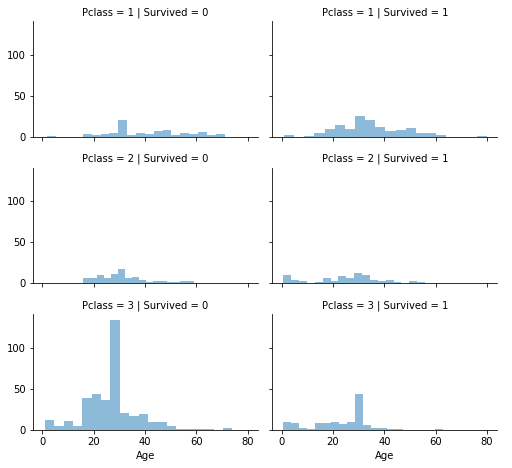

In [ ]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

# 2. Training Set & Test Set

In [ ]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train)
print(y_train)

     PassengerId  Pclass        Age  SibSp  Parch
298          299       1  29.699118      0      0
884          885       3  25.000000      0      0
247          248       2  24.000000      0      2
478          479       3  22.000000      0      0
305          306       1   0.920000      1      2
..           ...     ...        ...    ...    ...
106          107       3  21.000000      0      0
270          271       1  29.699118      0      0
860          861       3  41.000000      2      0
435          436       1  14.000000      1      2
102          103       1  21.000000      0      1

[668 rows x 5 columns]
298    1
884    0
247    1
478    0
305    1
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 668, dtype: int64


# 3. Pemodelan

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print('Predictions:', predictions)
print('Target:', y_test)

Predictions: [0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1
 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1
 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1
 0]
Target: 709    1
439    0
840    0
720    1
39     1
      ..
880    1
425    0
101    0
199    0
424    0
Name: Survived, Length: 223, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# 4. Evaluasi Model

In [ ]:
print(model.coef_)

[[-1.00349917e-04 -1.00531046e+00 -3.48105489e-02 -2.07908148e-01
   2.56708424e-01]]


In [ ]:
print('Accuracy:', accuracy_score(y_test, predictions))
print('F1:', f1_score(y_test, predictions))
print('Precision:', precision_score(y_test, predictions))
print('Recall:', recall_score(y_test, predictions))

Accuracy: 0.7354260089686099
F1: 0.6193548387096774
Precision: 0.7272727272727273
Recall: 0.5393258426966292


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80       134
           1       0.73      0.54      0.62        89

    accuracy                           0.74       223
   macro avg       0.73      0.70      0.71       223
weighted avg       0.73      0.74      0.73       223



Menggunakan ROC Curve, kita bisa menentukan precision-recall terbaik untuk memperbaiki model kita.

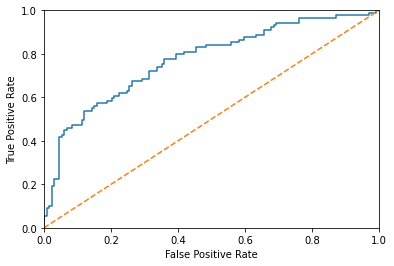

In [108]:
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Untuk kasus ini, saya ingin meninggikan Recall atau True Positive Rate, jadi nilai yang terbaik adalah sekitar 0.2 True Positive Rate sebagai threshold

In [ ]:
print(roc_auc_score(y_test, y_pred_proba[:, 1]))

0.77175918161999


# 5. Plot Predicted Values vs Measured

In [ ]:
results = pd.DataFrame({
    'Target':y_test,
    'Predicted':predictions
})
results

,Target,Predicted
709,1,0
439,0,0
840,0,0
720,1,1
39,1,0
...,...,...
880,1,1
425,0,0
101,0,0
199,0,1


# 6. Try with Threshold 0.2

In [118]:
y_pred_proba = model.predict_proba(X_test)[:,1] > 0.2

print('ROC - AUC SCORE:',roc_auc_score(y_test, y_pred_proba))
print('Accuracy:', accuracy_score(y_test, y_pred_proba))
print('Recall:', recall_score(y_test, y_pred_proba))
print('Precision:', precision_score(y_test,y_pred_proba))
print('F1:', f1_score(y_test,y_pred_proba))

ROC - AUC SCORE: 0.5465789032366258
Accuracy: 0.4618834080717489
Recall: 0.9662921348314607
Precision: 0.4236453201970443
F1: 0.5890410958904109


Recall score nya bagus, tapi ROC-AUC skornya rendah.

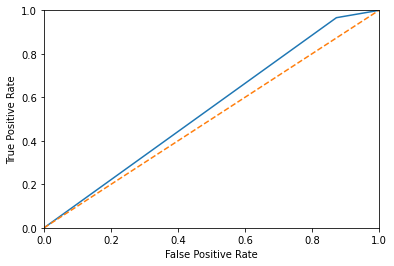

In [119]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()